### Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Задачи исследования

#### 1. Осмотр данных
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии


#### 2. Обработка данных
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить день недели, месяц и год объявления
- добавить этаж - первый, последний, другой
- добавить соотношение жилой и общей площади, а также отношение площади кухни к общей


#### 3. Ответы на вопросы
- Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики
и постройте графики. Сколько обычно длится процесс продажи?

- Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

- Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа
комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

- Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом
объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

- Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите
самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов
с ценой по всем предложениям и объявлениям в вашей выборке.

- Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.


#### 4. Результаты исследования
- Общие выводы
- Рекомендации

#### Описание данных


    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

## Этап 1. Получим данные, импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pprint
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

<div class="alert alert-info"> 

Прочтём данные и оценим их качество


</div>

In [3]:
try:
    df = pd.read_csv('/Users/borzi/projects/project_3/real_estate_data.csv', sep = '\t')
except:  
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')    
    
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00


In [4]:
df.tail(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00
23698,4,"1,350,000.00",32.30,2017-07-21T00:00:00,1,2.50,5.00,12.30,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


In [6]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19715,5,"11,700,000.00",119.60,2018-09-04T00:00:00,4,3.20,6.00,NaN,2,NaN,False,False,NaN,NaN,Санкт-Петербург,"25,442.00","4,017.00",1.00,510.00,0.00,NaN,67.00


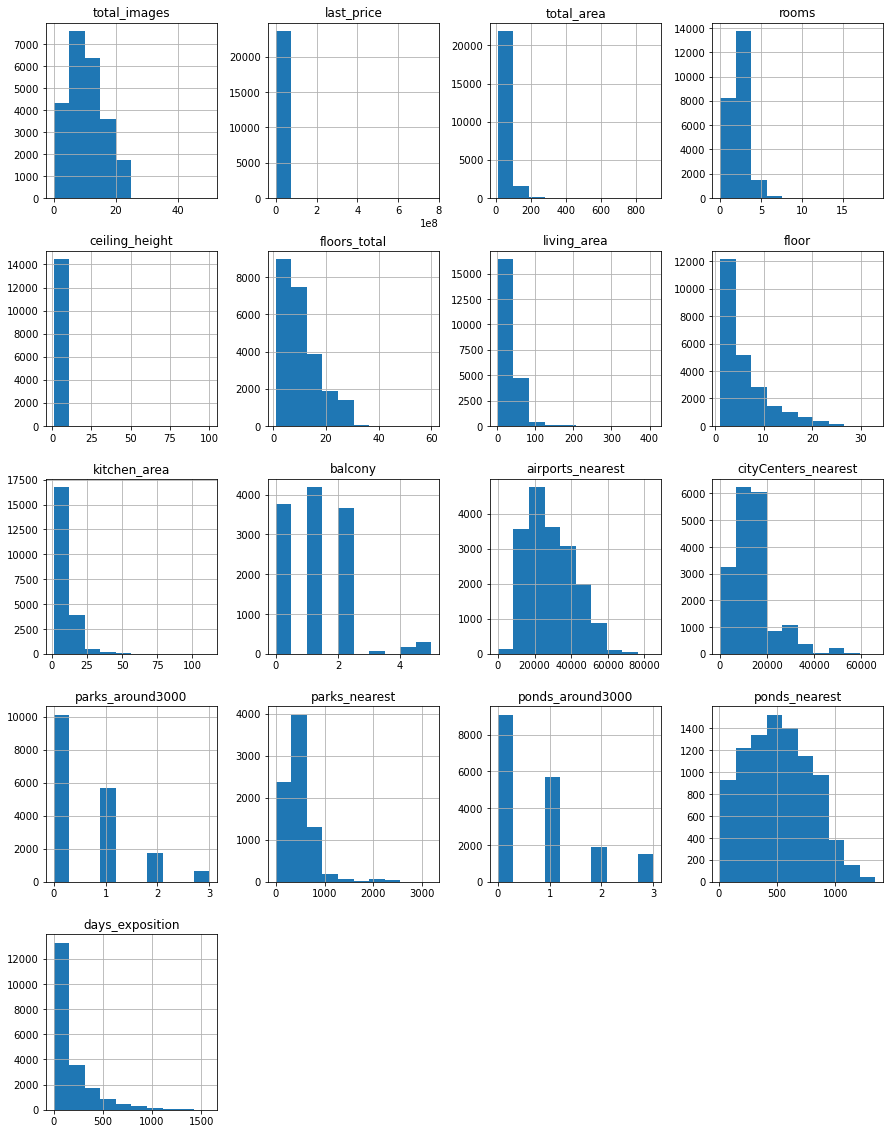

In [7]:
df.hist(figsize=(15, 20))
plt.show()

<div class="alert alert-info"> 
    
Гистограммы некоторых столбцов имеют отклоняющееся от нормальных значений распределения. Формат данных датафрейма неудобен для анализа.


</div>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
df.duplicated().sum()

0

<div class="alert alert-info"> 
    
**Выводы:**
    

- Много пропусков данных в строках 
- Названия колонок плохо читаются
- Типы данных некорректны
- Группировка столбцов между собой нелогична
- Регистр названий столбцов не одинаков
- Явных дубликатов нет


</div>

## Этап 2. Обработаем данные

In [10]:
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

<div class="alert alert-info"> 
    
Есть пропущенные значения в столбцах с параметрами квартир и расстоянием по причине некорректного заполнения клиентами формы на сайте.


</div>

In [11]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски в %' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

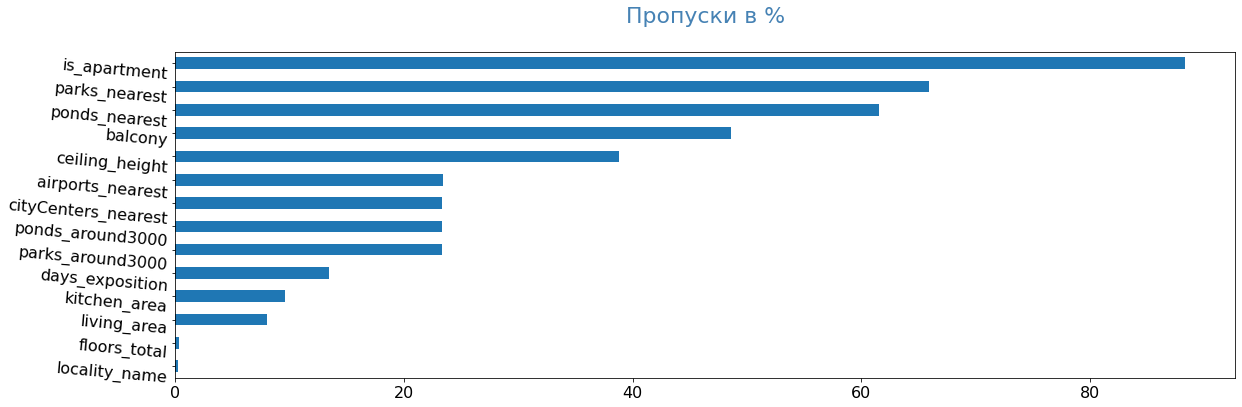

In [12]:
pass_value_barh(df)

In [13]:
 df.isnull().sum().sort_values()/df.shape[0]*100

total_images            0.00
open_plan               0.00
floor                   0.00
rooms                   0.00
studio                  0.00
total_area              0.00
last_price              0.00
first_day_exposition    0.00
locality_name           0.21
floors_total            0.36
living_area             8.03
kitchen_area            9.61
days_exposition        13.42
ponds_around3000       23.28
parks_around3000       23.28
cityCenters_nearest    23.29
airports_nearest       23.38
ceiling_height         38.80
balcony                48.61
ponds_nearest          61.56
parks_nearest          65.91
is_apartment           88.29
dtype: float64

<div class="alert alert-info"> 
    
В процентах пропуски выглядят не критично. Клиенты могут и не знать расстояние до объектов или им лень записать высоту потолка.


</div>

In [14]:
len(df['locality_name'].unique())

365

In [15]:
df['locality_name'].unique().tolist()

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

<div class="alert alert-info"> 

Посмотрим уникальные значения локаций. Есть однинаковые названия, записанные по разному
    


</div>

In [16]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

<div class="alert alert-info"> 

Заменим буву ё на е, устраним неявные дубликаты.
    


</div>

In [17]:
df.locality_name.nunique()

330

In [18]:
df['locality_name'].isna().sum()

49

In [19]:
df = df.dropna(subset=['locality_name'])

In [20]:
df['locality_name'].isna().sum()

0

<div class="alert alert-info"> 

Уберём неявные дубликаты. Удалим строки без названия города. В анализе они мешают. Клиентам такие объявления не интересны, так как не ясна локация квартиры.
    


</div>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [22]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [23]:
df['is_apartment'] = df['is_apartment'].fillna(0)

In [24]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [25]:
df['studio'].unique()

array([False,  True])

In [26]:
df['studio'].value_counts()

False    23501
True       149
Name: studio, dtype: int64

In [27]:
df['studio'] = df['studio'].map({True: 1, False: 0})

In [28]:
df['open_plan'].value_counts()

False    23583
True        67
Name: open_plan, dtype: int64

In [29]:
df['open_plan'] = df['open_plan'].map({True: 1, False: 0})

<div class="alert alert-info"> 
    
Проверим столбцы - **'is_apartment', 'studio', 'open_plan'** . Преобразуем в них тип данных для точности вычислений - Nan заменим на False. Приведём булев тип к цифровому.


</div>

In [30]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,0,0,0,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,0,0,0,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,0,0,0,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  int64  
 10  studio                23650 non-null  int64  
 11  open_plan             23650 non-null  int64  
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [32]:
df['is_apartment'] = df['is_apartment'].astype('int16')
df['studio'] = df['studio'].astype('int16')
df['open_plan'] = df['open_plan'].astype('int16')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  int16  
 10  studio                23650 non-null  int16  
 11  open_plan             23650 non-null  int16  
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-info"> 
    
Уменьшим объём датафрейма, для чего изменим тип данных в **'is_apartment', 'studio', 'open_plan'** . Это повысит скорость вычислений. 


</div>

In [34]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [35]:
df['balcony'].value_counts().sort_values()

3.00      81
4.00     182
5.00     304
2.00    3658
0.00    3725
1.00    4187
Name: balcony, dtype: int64

<div class="alert alert-info"> 
    
Проверим балконы. Данные подходят для анализа.


</div>

In [36]:
df['living_area'].unique().sum()

nan

In [37]:
df['living_area'] = df['living_area'].fillna(df.groupby('rooms')['living_area'].transform("median"))

In [38]:
df['living_area'].unique().sum()

98352.17651199999

<div class="alert alert-info"> 
    
Поменяем тип данных в стоблце - **living_area** 


</div>

In [39]:
df[df['total_area']*0.95 <= (df ['living_area'] + df['kitchen_area'])][[
                                                    'total_area','living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.00,59.00,12.00
171,49.00,38.00,10.00
184,30.20,26.10,6.20
220,37.00,28.00,9.00
545,23.80,20.00,5.00
...,...,...,...
23108,33.95,21.68,12.00
23139,81.00,64.00,13.00
23202,67.92,63.00,13.04
23297,48.20,42.20,6.00


<div class="alert alert-info">
После заполнения синтетическими данными столбцов, стоит провести проверку на корректность значений всех площадей, т.к. есть коридоры, санузлы, балконы
    
</div>



In [40]:
df['total_area'] = df['total_area'].fillna(df.groupby('rooms')['total_area'].transform("median"))

<div class="alert alert-info"> 
    
Заполним столбец медианным значением по квартирам с таким же количеством комнат.

</div>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  int16  
 10  studio                23650 non-null  int16  
 11  open_plan             23650 non-null  int16  
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [42]:
df['floors_total'] = df['floors_total'].astype('float16')

<div class="alert alert-info"> 
    
Поменяем тип данных в стоблце - **floors_total** 


</div>

In [43]:
df['floors_total'].isna().sum()

85

In [44]:
df = df.dropna(subset=['floors_total'])

<div class="alert alert-info"> 
    
Удалим пропуски в стоблце - **floors_total** 


</div>

In [45]:
df['floors_total'].isna().sum()

0

#### Показатели о количестве объявлений в датасете, минимальных и максимальных значениях в выбранных параметрах о продаже квартир  

In [46]:
data = df.copy()
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,565.00","23,565.00","14,481.00","20,394.00","23,565.00","23,565.00","21,343.00","23,565.00","23,565.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


<div class="alert alert-info">
Остались аномалии и редкости в колонках: 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'
    
</div>



<div class="alert alert-info">
Можно механически бороться с выбросами, но выборка неоднородна. Здесь и малые поселки, и вторая столица страны, и исторический фонд и массовая застройка, и однушки и большое кол-во многокомнатных квартир, или наоборот одна две квартиры с количеством комнат больше 7-ми.
      
При множестве населенных пунктов, многокомнатности такой подход усложнит проект — придется разбить и объединить записи таблицы по нескольким параметрам (кол-во комнат, район, и т.д.), а затем  выполнять все остальные пункты на каждой отдельной выборке.
        
Применим другой подход — убираем редкие значения и следим за количеством потерь. 
        
    
</div>    


In [47]:
data.rooms.value_counts().to_frame()

,rooms
1,8004
2,7897
3,5779
4,1172
5,325
0,194
6,104
7,59
8,12
9,8


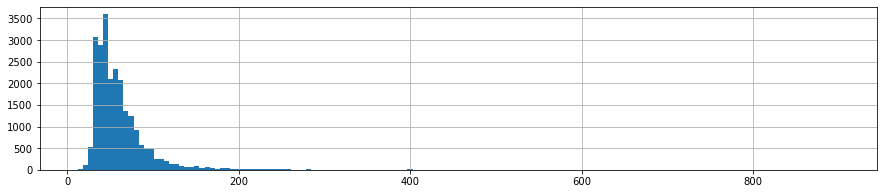

In [48]:
data.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-info">
Т.е. все квартиры более 200 квадратных метров можно считать редкостями.Особенно это заметно на втором графике, где мы подробно рассматриваем промежуток от 180 кв. м до 500
    
</div>
     
 

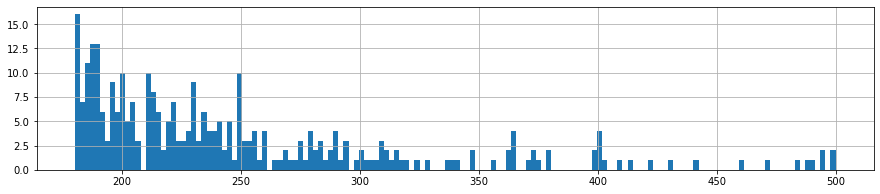

In [49]:
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [50]:
df['last_price'].sort_values(ascending=False).head(20)

12971   763,000,000.00
19540   420,000,000.00
14706   401,300,000.00
1436    330,000,000.00
15651   300,000,000.00
22831   289,238,400.00
16461   245,000,000.00
13749   240,000,000.00
5893    230,000,000.00
8900    190,870,000.00
19865   180,000,000.00
19155   160,000,000.00
2536    159,984,000.00
16495   159,000,000.00
1026    155,000,000.00
7857    150,000,000.00
15016   150,000,000.00
22229   148,000,000.00
12674   140,000,000.00
12859   140,000,000.00
Name: last_price, dtype: float64

#### Значения параметров объектов недвижимости на разных квантилях

In [51]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.010000,1.00,25.32,2.50,4.00,"1,000,000.00",13.10,5.00,1.00,2.00
0.500000,2.00,52.00,2.65,95.00,"4,646,000.00",30.30,9.10,4.00,9.00
0.900000,3.00,93.40,3.06,459.70,"10,900,000.00",54.70,15.89,13.00,22.00
0.997600,7.00,309.83,5.22,"1,312.06","82,000,000.00",180.00,50.00,25.00,27.00


<div class="alert alert-info">
Остались аномалии и редкости в колонках: 
        
        'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'
    
</div>



#### Возьмем сложный пример — колонку с пропусками days_exposition

In [52]:
data = df.copy()

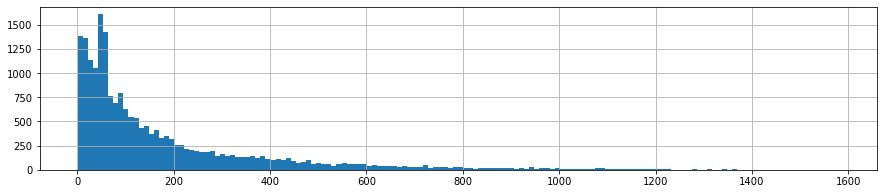

In [53]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

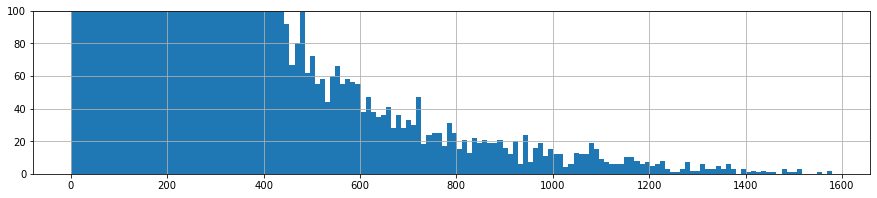

In [54]:
data.days_exposition.hist(bins = 150, figsize = (15,3))
plt.ylim(0, 100);

<div class="alert alert-info">
Редкости начинаются примерно после 900 дней продажи
    
</div>


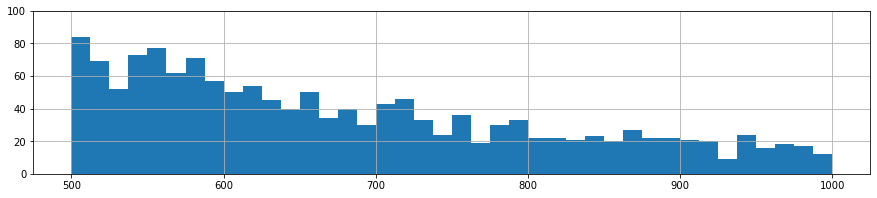

In [55]:
# check
data.days_exposition.hist(bins = 40, figsize = (15,3), range = (500,1000))
plt.ylim(0, 100);

#### Проверим сколько записей есть после 1000 дней продажи

In [56]:
data[data.days_exposition > 1000]['days_exposition'].count()

274

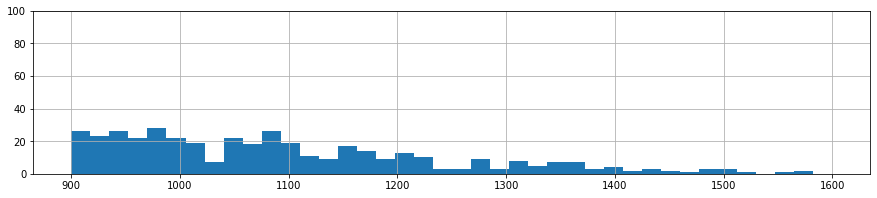

In [57]:
data.days_exposition.hist(bins = 40, figsize = (15,3), range = (900,1600))
plt.ylim(0, 100);

#### Оставляем все записи, где время продаж менее 1000 дней и удаляем пропуски

In [58]:
data = data[(data.days_exposition <= 1000) | (data.days_exposition.isna())]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23291 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23291 non-null  int64  
 1   last_price            23291 non-null  float64
 2   total_area            23291 non-null  float64
 3   first_day_exposition  23291 non-null  object 
 4   rooms                 23291 non-null  int64  
 5   ceiling_height        14294 non-null  float64
 6   floors_total          23291 non-null  float16
 7   living_area           23291 non-null  float64
 8   floor                 23291 non-null  int64  
 9   is_apartment          23291 non-null  int16  
 10  studio                23291 non-null  int16  
 11  open_plan             23291 non-null  int16  
 12  kitchen_area          21083 non-null  float64
 13  balcony               12002 non-null  float64
 14  locality_name         23291 non-null  object 
 15  airports_nearest   

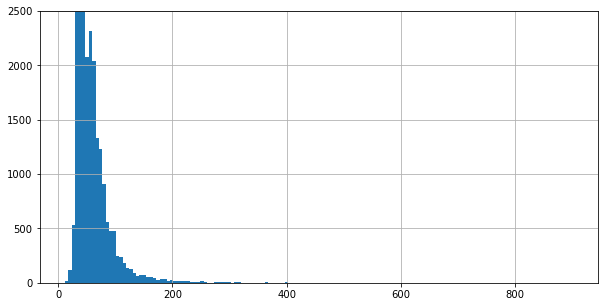

In [60]:
data.total_area.hist(bins = 150, figsize = (10,5))
plt.ylim(0, 2500);

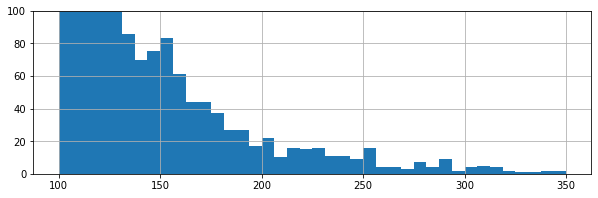

In [61]:
data.total_area.hist(bins = 40, figsize = (10,3), range = (100,350))
plt.ylim(0, 100);

In [62]:
data[data.total_area > 150]['total_area'].count()

542

In [63]:
data = data[(data.total_area <= 150) | (data.total_area.isna())].reset_index(drop=True)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22749 entries, 0 to 22748
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22749 non-null  int64  
 1   last_price            22749 non-null  float64
 2   total_area            22749 non-null  float64
 3   first_day_exposition  22749 non-null  object 
 4   rooms                 22749 non-null  int64  
 5   ceiling_height        13929 non-null  float64
 6   floors_total          22749 non-null  float16
 7   living_area           22749 non-null  float64
 8   floor                 22749 non-null  int64  
 9   is_apartment          22749 non-null  int16  
 10  studio                22749 non-null  int16  
 11  open_plan             22749 non-null  int16  
 12  kitchen_area          20606 non-null  float64
 13  balcony               11761 non-null  float64
 14  locality_name         22749 non-null  object 
 15  airports_nearest   

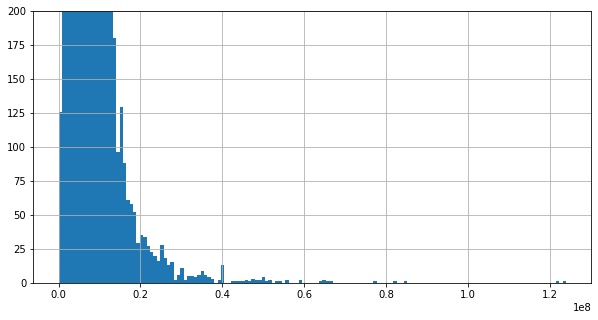

In [65]:
data.last_price.hist(bins = 150, figsize = (10,5))
plt.ylim(0, 200);

In [66]:
data[data.last_price > 30000000]['last_price'].count()

97

In [67]:
data = data[(data.last_price <= 30000000) | (data.last_price.isna())].reset_index(drop=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22652 entries, 0 to 22651
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22652 non-null  int64  
 1   last_price            22652 non-null  float64
 2   total_area            22652 non-null  float64
 3   first_day_exposition  22652 non-null  object 
 4   rooms                 22652 non-null  int64  
 5   ceiling_height        13867 non-null  float64
 6   floors_total          22652 non-null  float16
 7   living_area           22652 non-null  float64
 8   floor                 22652 non-null  int64  
 9   is_apartment          22652 non-null  int16  
 10  studio                22652 non-null  int16  
 11  open_plan             22652 non-null  int16  
 12  kitchen_area          20513 non-null  float64
 13  balcony               11704 non-null  float64
 14  locality_name         22652 non-null  object 
 15  airports_nearest   

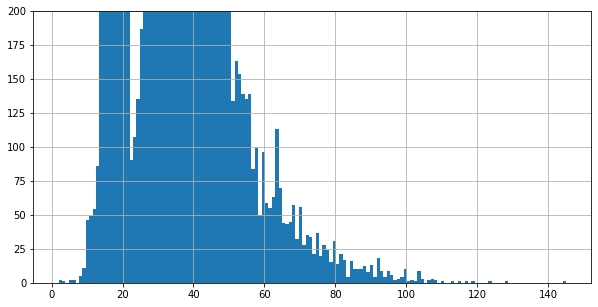

In [69]:
data.living_area.hist(bins = 150, figsize = (10,5))
plt.ylim(0, 200);

In [70]:
data[data.living_area > 80]['living_area'].count()

235

In [71]:
data = data[(data.living_area <=  80) | (data.living_area.isna())].reset_index(drop=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22417 entries, 0 to 22416
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22417 non-null  int64  
 1   last_price            22417 non-null  float64
 2   total_area            22417 non-null  float64
 3   first_day_exposition  22417 non-null  object 
 4   rooms                 22417 non-null  int64  
 5   ceiling_height        13696 non-null  float64
 6   floors_total          22417 non-null  float16
 7   living_area           22417 non-null  float64
 8   floor                 22417 non-null  int64  
 9   is_apartment          22417 non-null  int16  
 10  studio                22417 non-null  int16  
 11  open_plan             22417 non-null  int16  
 12  kitchen_area          20300 non-null  float64
 13  balcony               11605 non-null  float64
 14  locality_name         22417 non-null  object 
 15  airports_nearest   

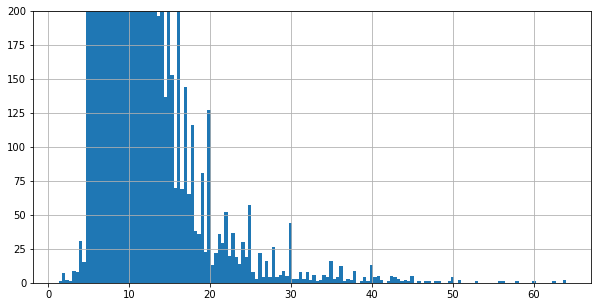

In [73]:
data.kitchen_area.hist(bins = 150, figsize = (10,5))
plt.ylim(0, 200);

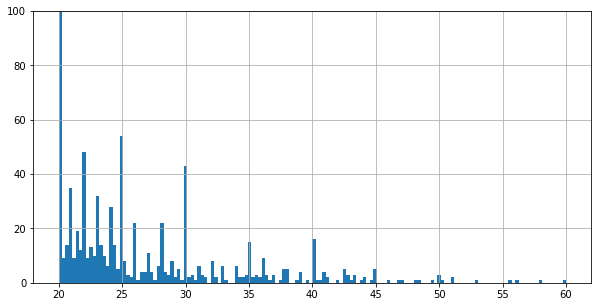

In [74]:
data.kitchen_area.hist(bins = 150, figsize = (10,5), range = (20,60))
plt.ylim(0, 100);

In [75]:
 data[data.kitchen_area > 25]['kitchen_area'].count()

323

In [76]:
data = data[(data.kitchen_area <= 25) | (data.kitchen_area.isna())].reset_index(drop=True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22094 entries, 0 to 22093
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22094 non-null  int64  
 1   last_price            22094 non-null  float64
 2   total_area            22094 non-null  float64
 3   first_day_exposition  22094 non-null  object 
 4   rooms                 22094 non-null  int64  
 5   ceiling_height        13469 non-null  float64
 6   floors_total          22094 non-null  float16
 7   living_area           22094 non-null  float64
 8   floor                 22094 non-null  int64  
 9   is_apartment          22094 non-null  int16  
 10  studio                22094 non-null  int16  
 11  open_plan             22094 non-null  int16  
 12  kitchen_area          19977 non-null  float64
 13  balcony               11456 non-null  float64
 14  locality_name         22094 non-null  object 
 15  airports_nearest   

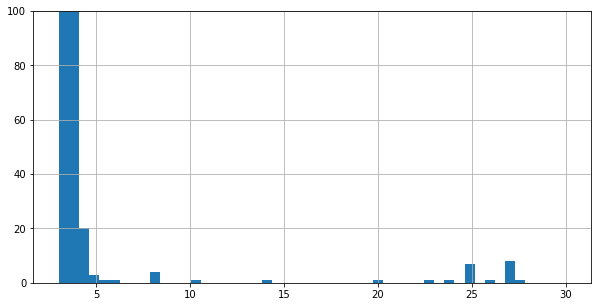

In [78]:
data.ceiling_height.hist(bins = 50, figsize = (10,5), range = (3,30))
plt.ylim(0, 100);

In [79]:
 data[data.ceiling_height > 3]['ceiling_height'].count()

1075

In [80]:
data = data[(data.ceiling_height <= 3) | (data.ceiling_height.isna())].reset_index(drop=True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21019 entries, 0 to 21018
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21019 non-null  int64  
 1   last_price            21019 non-null  float64
 2   total_area            21019 non-null  float64
 3   first_day_exposition  21019 non-null  object 
 4   rooms                 21019 non-null  int64  
 5   ceiling_height        12394 non-null  float64
 6   floors_total          21019 non-null  float16
 7   living_area           21019 non-null  float64
 8   floor                 21019 non-null  int64  
 9   is_apartment          21019 non-null  int16  
 10  studio                21019 non-null  int16  
 11  open_plan             21019 non-null  int16  
 12  kitchen_area          18984 non-null  float64
 13  balcony               11079 non-null  float64
 14  locality_name         21019 non-null  object 
 15  airports_nearest   

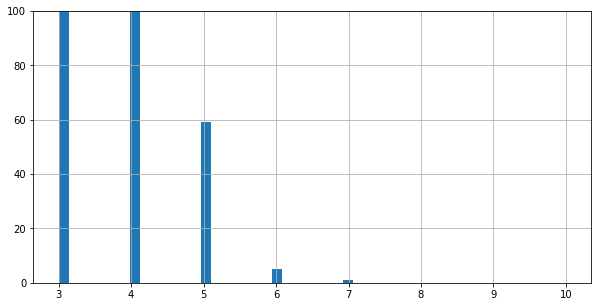

In [82]:
data.rooms.hist(bins = 50, figsize = (10,5), range = (3,10))
plt.ylim(0, 100);

In [83]:
data[data.rooms > 6]['rooms'].count()

1

In [84]:
data = data[(data.rooms <= 6) | (data.rooms.isna())].reset_index(drop=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21018 entries, 0 to 21017
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21018 non-null  int64  
 1   last_price            21018 non-null  float64
 2   total_area            21018 non-null  float64
 3   first_day_exposition  21018 non-null  object 
 4   rooms                 21018 non-null  int64  
 5   ceiling_height        12393 non-null  float64
 6   floors_total          21018 non-null  float16
 7   living_area           21018 non-null  float64
 8   floor                 21018 non-null  int64  
 9   is_apartment          21018 non-null  int16  
 10  studio                21018 non-null  int16  
 11  open_plan             21018 non-null  int16  
 12  kitchen_area          18983 non-null  float64
 13  balcony               11079 non-null  float64
 14  locality_name         21018 non-null  object 
 15  airports_nearest   

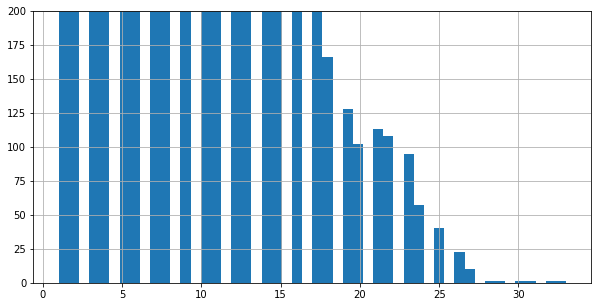

In [86]:
data.floor.hist(bins = 50, figsize = (10,5))
plt.ylim(0, 200);

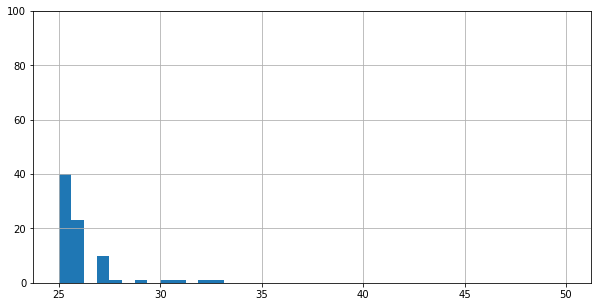

In [87]:
data.floor.hist(bins = 40, figsize = (10,5), range = (25,50))
plt.ylim(0, 100);

In [88]:
data[data.floor > 25]['floor'].count()

39

In [89]:
data = data[(data.floor <= 25) | (data.floor.isna())].reset_index(drop=True)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20979 entries, 0 to 20978
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20979 non-null  int64  
 1   last_price            20979 non-null  float64
 2   total_area            20979 non-null  float64
 3   first_day_exposition  20979 non-null  object 
 4   rooms                 20979 non-null  int64  
 5   ceiling_height        12377 non-null  float64
 6   floors_total          20979 non-null  float16
 7   living_area           20979 non-null  float64
 8   floor                 20979 non-null  int64  
 9   is_apartment          20979 non-null  int16  
 10  studio                20979 non-null  int16  
 11  open_plan             20979 non-null  int16  
 12  kitchen_area          18947 non-null  float64
 13  balcony               11053 non-null  float64
 14  locality_name         20979 non-null  object 
 15  airports_nearest   

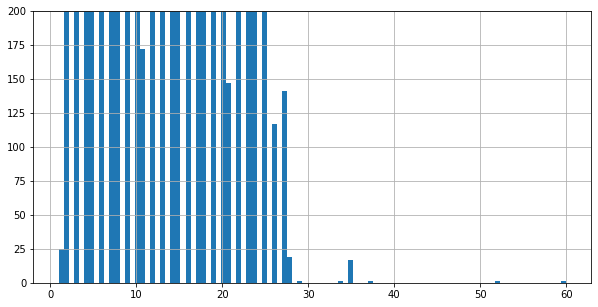

In [91]:
data.floors_total.hist(bins = 100, figsize = (10,5))
plt.ylim(0, 200);

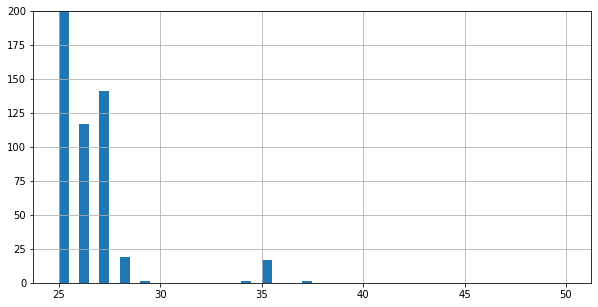

In [92]:
data.floors_total.hist(bins = 50, figsize = (10,5), range = (25,50))
plt.ylim(0, 200);

In [93]:
data[data.floors_total > 25]['floors_total'].count()

299

In [94]:
data = data[(data.floors_total<= 25) | (data.floors_total.isna())].reset_index(drop=True)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20680 entries, 0 to 20679
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20680 non-null  int64  
 1   last_price            20680 non-null  float64
 2   total_area            20680 non-null  float64
 3   first_day_exposition  20680 non-null  object 
 4   rooms                 20680 non-null  int64  
 5   ceiling_height        12247 non-null  float64
 6   floors_total          20680 non-null  float16
 7   living_area           20680 non-null  float64
 8   floor                 20680 non-null  int64  
 9   is_apartment          20680 non-null  int16  
 10  studio                20680 non-null  int16  
 11  open_plan             20680 non-null  int16  
 12  kitchen_area          18672 non-null  float64
 13  balcony               10884 non-null  float64
 14  locality_name         20680 non-null  object 
 15  airports_nearest   

#### Показатели о количестве объявлений в датасете, минимальных и максимальных значениях в выбранных параметрах о продаже квартир


In [96]:
(
  data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,680.00","20,680.00","12,247.00","18,095.00","20,680.00","20,680.00","18,672.00","20,680.00","20,680.00"
min,0.00,12.00,1.00,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,6.00,150.00,3.00,"1,000.00","29,999,000.00",80.00,25.00,25.00,25.00


<div class="alert alert-info">
Остались аномалии и редкости в колонках: 
        
      'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'
        
в том числе квартиры со стометровыми потолками
    
</div>


#### Добавим в таблицу столбцы с новыми параметрами

In [97]:
df = data.copy()

In [98]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format= "%Y-%m-%dT%H:%M:%S")

In [99]:
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

<div class="alert alert-info"> 
    
Переведём в строку дату публикации объявления. Добавим стобцы - день, месяц и год публикации.


</div>

In [100]:
df['city_center_nearest_km'] = (df['cityCenters_nearest'] / 1000).round()
df['airports_nearest_km'] = (df['airports_nearest'] / 1000).round()

In [101]:
del df['cityCenters_nearest']
del df['airports_nearest']


<div class="alert alert-info"> 
    
Приведем к километрам данные столбца с расстоянием до центра города. Удалим столбец с метрами.  


</div>

In [102]:
def floor_number(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [103]:
df['floor_number'] = df.apply(floor_number, axis=1)

In [104]:
df['floor_number'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

<div class="alert alert-info"> 
    
Добавим тип этажа квартиры - **'другой', 'первый', 'последний'.**


</div>

In [105]:
df['price_m2'] = df['last_price'] / df['total_area']
df['price_m2'] = df['price_m2'].round(decimals=2)

<div class="alert alert-info"> 
    
Рассчитаем цену квадратного метра жилья. Добавим столбец с ценой за кв.м


</div>

In [106]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_nearest_km,airports_nearest_km,floor_number,price_m2
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,NaN,Санкт-Петербург,1.00,482.00,2.00,755.00,NaN,Thursday,March,2019,16.00,19.00,другой,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,0.00,NaN,0.00,NaN,81.00,Tuesday,December,2018,19.00,13.00,первый,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,1.00,90.00,2.00,574.00,558.00,Thursday,August,2015,14.00,22.00,другой,"92,785.71"


## Проведём исследовательский анализ данных

#### Изучим параметры объектов

Text(0.5, 1.0, 'Жилая площадь')

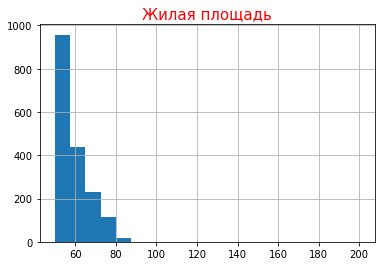

In [107]:
df['living_area'].hist(bins = 20, range = (50,200))\
.set_title('Жилая площадь', fontsize = 15, color = 'red')


Text(0.5, 1.0, 'Общая площадь')

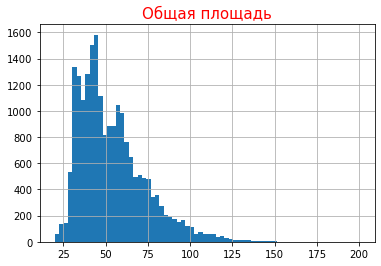

In [108]:
df['total_area'].hist(bins = 70, range = (20,200))\
.set_title('Общая площадь', fontsize = 15, color = 'red')

<div class="alert alert-info"> 


Продаётся много квартир общей площадью 30-75 кв.м, пиковые значения около 45 кв.м, это двухкомнатные, старой планировки   


</div>

Text(0.5, 1.0, 'Площадь кухни')

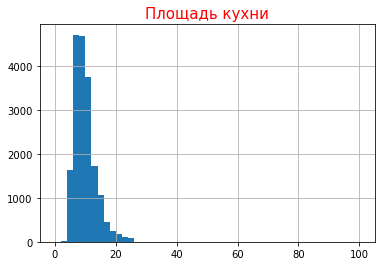

In [109]:
df['kitchen_area'].hist(bins = 50, range = (0,100))\
.set_title('Площадь кухни', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Наиболее востребована лощадь кухни около 10 кв.м   


</div>

Text(0.5, 1.0, 'Высота потолка')

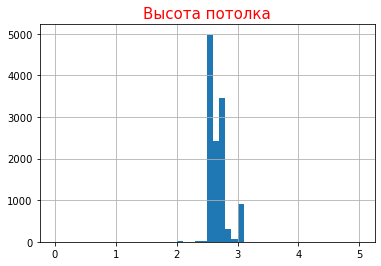

In [110]:
df['ceiling_height'].hist(bins = 50, range = (0,5))\
.set_title('Высота потолка', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Высота потолка - 2,5 м 


</div>

Text(0.5, 1.0, 'Этаж')

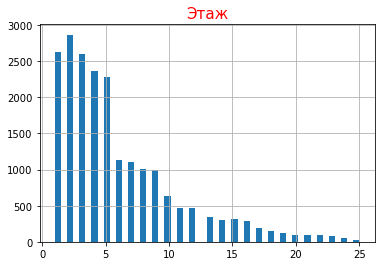

In [111]:
df['floor'].hist(bins = 50, range = (1,25))\
.set_title('Этаж', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Популярны 3-5 этажи, на 2 этаже продается больше квартир.


</div>

Text(0.5, 1.0, 'Всего этажей')

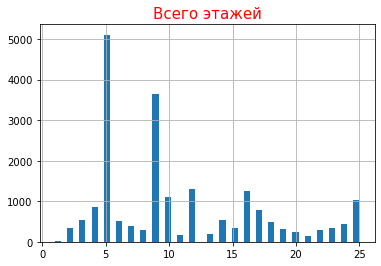

In [112]:
df['floors_total'].hist(bins = 50, range = (1,25))\
.set_title('Всего этажей', fontsize = 15, color = 'red')

<div class="alert alert-info"> 
    

Спрос на 5, 9, 12, 17 и 25-этажные дома.


</div>

Text(0.5, 1.0, 'Расстояние до центра')

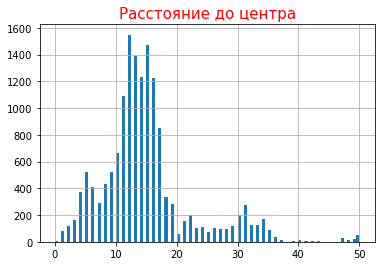

In [113]:
df['city_center_nearest_km'].hist(bins = 100, range = (0,50))\
.set_title('Расстояние до центра', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Расстояние от центра - пики около 5 км и 10-18 км

</div>

Text(0.5, 1.0, 'Количество комнат')

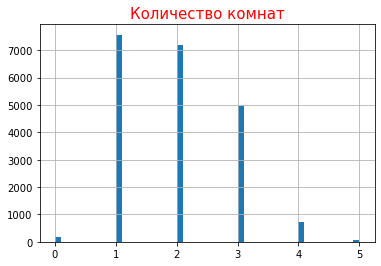

In [114]:
df['rooms'].hist(bins = 50, range = (0,5))\
.set_title('Количество комнат', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Лучше всего продаются 1 и 2-комнатные квартиры.

</div>

Text(0.5, 1.0, 'Тип этажа')

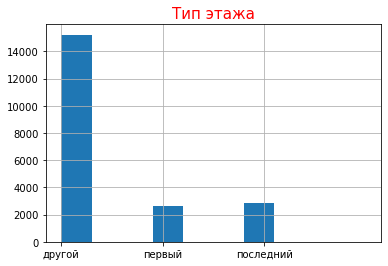

In [115]:
df['floor_number'].hist(bins = 10, range = (0,3))\
.set_title('Тип этажа', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Первые и последние этажи не пользуются спросом.
    
</div>

Text(0.5, 1.0, 'Расстояние до аэропорта')

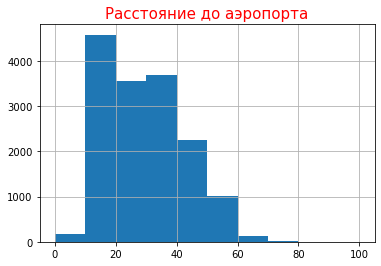

In [116]:
df['airports_nearest_km'].hist(bins = 10, range = (0,100))\
.set_title('Расстояние до аэропорта', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Расстояние до аэропорта 10-30 км.
    
</div>

Text(0.5, 1.0, 'Расстояние до парка')

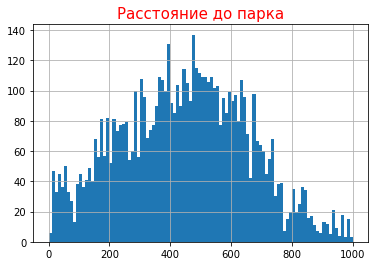

In [117]:
df['parks_nearest'].hist(bins = 100, range = (0,1000))\
.set_title('Расстояние до парка', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Расстояние до парка 400-500 м имеет наибольший спрос.
    
</div>

Text(0.5, 1.0, 'Месяц размещения')

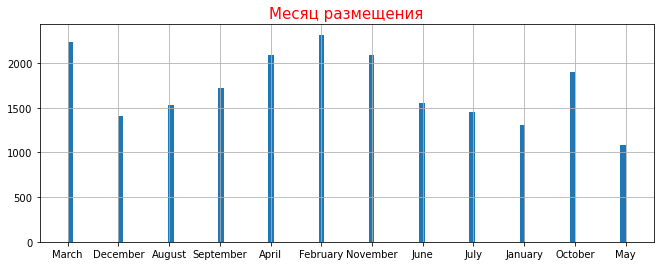

In [118]:
df['month_exposition'].hist(bins = 100, figsize=(11,4)).set_title('Месяц размещения', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Март и февраль - нибольшие показатели. Апрель и октярь чуть меньше, но выше других месяцев.

</div>

Text(0.5, 1.0, 'День недели')

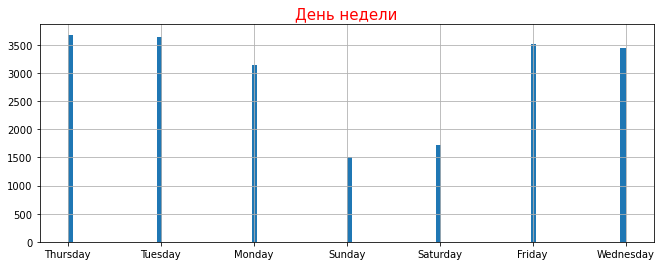

In [119]:
df['day_of_week_exposition'].hist(bins = 100, figsize=(11,4))\
.set_title('День недели', fontsize = 15, color = 'red')

<div class="alert alert-info"> 

Вторник, среда, четверг и пятница, в будние дни больше объявлений о продаже недвижимости.

</div>

#### 2. Как быстро продавались квартиры - столбец days_exposition.  

Text(0.5, 1.0, 'Количество дней')

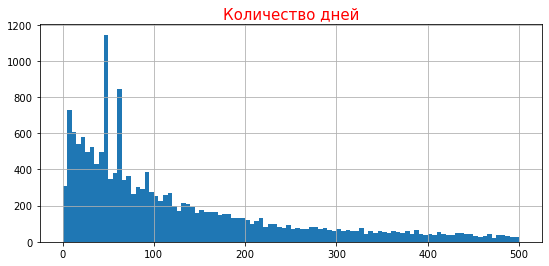

In [120]:
df.days_exposition.hist(bins = 100, range = (0,500), figsize=(9,4))\
.set_title('Количество дней', fontsize = 15, color = 'red')

<AxesSubplot:xlabel='days_exposition', ylabel='last_price'>

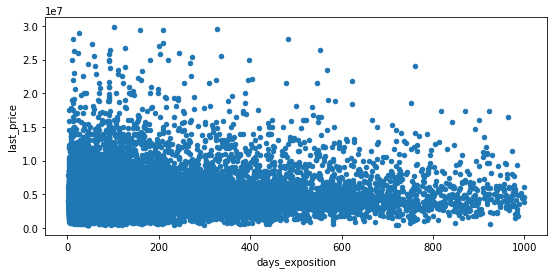

In [121]:
df.sort_values('days_exposition')\
.plot(x='days_exposition', y='last_price', kind='scatter', figsize = (9,4))

In [122]:
def remove_extreme (df, column,graphic=0,x=10,y=10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    t = q3 - q1
    sample = (df[column] >= (q1 - 1.5*t)) & (df[column] <= (q3 + 1.5*t))
    if graphic == 1:
        return df.loc[sample].boxplot([column], figsize=(x,y))
    else:
        return df.loc[sample]

In [123]:
remove_extreme(df,'days_exposition',0)['days_exposition'].median()

78.0

In [124]:
remove_extreme(df,'days_exposition',0)['days_exposition'].mean()

118.76933701657458

Text(0.5, 1.0, 'День недели')

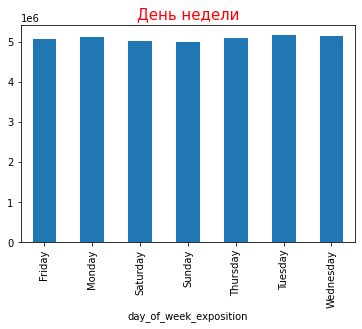

In [125]:
df.groupby('day_of_week_exposition')['last_price'].mean().plot.bar()\
.set_title('День недели', fontsize = 15, color = 'red')

Text(0.5, 1.0, 'Количество комнат')

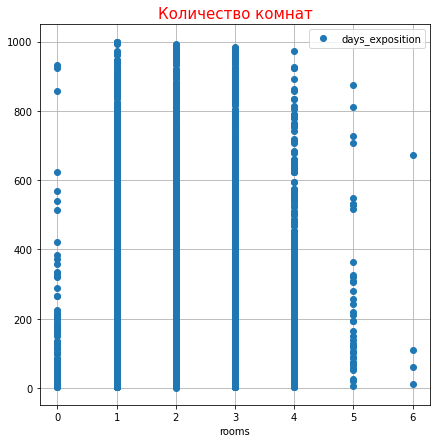

In [126]:
df.sort_values('days_exposition')\
.plot(x='rooms', y='days_exposition',grid=True, style= 'o', figsize=(7, 7))\
.set_title('Количество комнат', fontsize = 15, color = 'red')

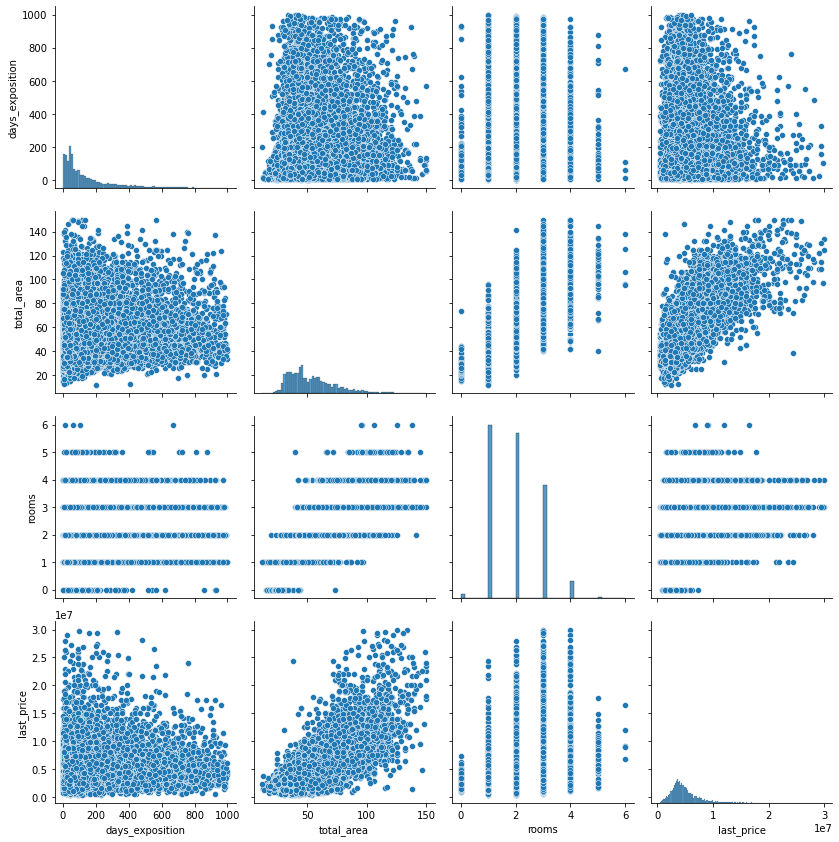

In [127]:
sns.pairplot(data[['days_exposition', 'total_area', 'rooms', 'last_price']])
plt.gcf().set_size_inches(12,12);


<div class="alert alert-info"> 


Продажа квартиры в среднем занимает около 78 дней, больше продаж происходит во вторник и среду. Быстрее продаются дорогие, 2-комнатные квартиры, небольшой общей площади.
    


</div>

#### 2. Какие продажи можно считать быстрыми, а какие - необычно долгими?

In [128]:
def days_exposition_time(row):
    if row['days_exposition'] < 3:
        return 'быстро'
    elif row['days_exposition'] > 180:
        return 'долго'
    else:
        return 'средне'

In [129]:
df['days_exposition_time'] = df.apply(days_exposition_time, axis=1)

In [130]:
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day_of_week_exposition,month_exposition,year_exposition,city_center_nearest_km,airports_nearest_km,floor_number,price_m2,days_exposition_time
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16.00,51.00,8,0,0,0,25.00,NaN,Санкт-Петербург,1.00,482.00,2.00,755.00,NaN,Thursday,March,2019,16.00,19.00,другой,"120,370.37",средне
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11.00,18.60,1,0,0,0,11.00,2.00,поселок Шушары,0.00,NaN,0.00,NaN,81.00,Tuesday,December,2018,19.00,13.00,первый,"82,920.79",средне
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5.00,34.30,4,0,0,0,8.30,0.00,Санкт-Петербург,1.00,90.00,2.00,574.00,558.00,Thursday,August,2015,14.00,22.00,другой,"92,785.71",долго


In [131]:
df.groupby('days_exposition_time').agg(
    {'price_m2':'median',\
     'living_area':'median',\
     'last_price':'median',\
     'floors_total':'median',\
     'rooms':'median',\
     'parks_nearest':'median',\
     'city_center_nearest_km':'median',\
    }).sort_values(by='price_m2', ascending=False)

,price_m2,living_area,last_price,floors_total,rooms,parks_nearest,city_center_nearest_km
days_exposition_time,,,,,,,
быстро,"104,460.47",23.85,"5,085,000.00",5.00,2.00,252.50,11.00
средне,"94,088.96",29.40,"4,395,000.00",9.00,2.00,467.00,14.00
долго,"90,418.03",30.00,"4,450,000.00",9.00,2.00,460.00,13.00


<div class="alert alert-info"> 

- Бысто продаются дорогие квартиры в 5-этажках, 1-комнатные судя по жилой площади, в 250 м от парка, 10 км от центра, на 3-5 этажах, высота потолка - 2,75 м.  
    
- Необычно долго - в 9-этажках, 2-комнатные,  в 450 м от парка, 12 км от центра, на 1-2 этажах, высота потолка - 2,5 м.
    


</div>



#### 3. Какие факторы больше всего влияют на общую стоимость объекта?

In [132]:
df[['last_price', 'total_area', 'days_exposition', 'price_m2', 'floors_total']].describe()

,last_price,total_area,days_exposition,price_m2,floors_total
count,"20,680.00","20,680.00","18,095.00","20,680.00","20,680.00"
mean,"5,101,553.38",53.74,160.99,"93,856.90",inf
std,"3,045,336.26",19.72,182.79,"33,447.37",6.36
min,"430,000.00",12.00,1.00,"7,962.96",1.00
25%,"3,300,000.00",39.00,43.00,"74,599.46",5.00
50%,"4,400,000.00",49.30,90.00,"93,167.70",9.00
75%,"6,000,000.00",64.00,211.00,"110,946.90",16.00
max,"29,999,000.00",150.00,"1,000.00","640,422.35",25.00


In [133]:
remove_extreme(df,'price_m2',0)['price_m2'].mean()

91812.1256742158

In [134]:
(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,680.00","20,680.00","12,247.00","18,095.00","20,680.00","20,680.00","18,672.00","20,680.00","20,680.00"
min,0.00,12.00,1.00,1.00,"430,000.00",2.00,1.30,1.00,1.00
max,6.00,150.00,3.00,"1,000.00","29,999,000.00",80.00,25.00,25.00,25.00


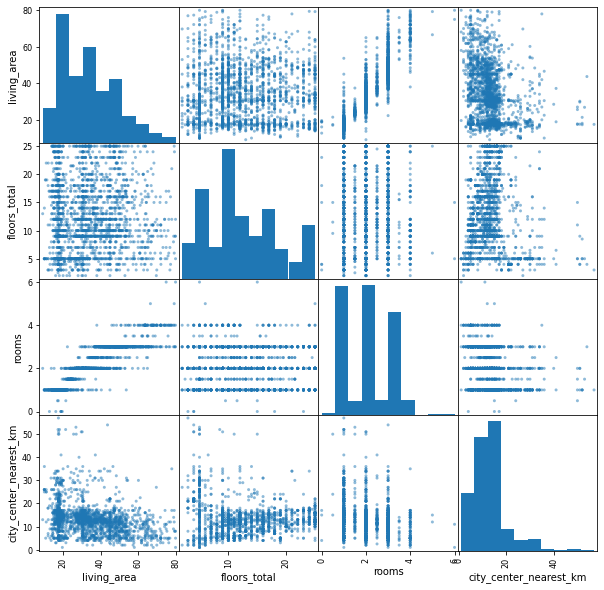

In [135]:
n = df.groupby('last_price').agg(
    {'living_area':'median',\
     'floors_total':'median',\
     'rooms':'median',\
     'city_center_nearest_km':'median',\
    }).sort_values(by='last_price', ascending=False)
pd.plotting.scatter_matrix(n, alpha=0.5, figsize=(10,10), grid=False, diagonal='hist', 
marker='.', range_padding=0.05)
plt.show()

In [136]:
corr = df[['last_price',\
           'total_area',\
           'days_exposition',\
           'city_center_nearest_km',\
           'rooms']].corr() 
corr.style.background_gradient(cmap='coolwarm') 

,last_price,total_area,days_exposition,city_center_nearest_km,rooms
last_price,1.000000,0.729678,0.066560,-0.308931,0.425618
total_area,0.729678,1.000000,0.110651,-0.138700,0.789450
days_exposition,0.066560,0.110651,1.000000,-0.017587,0.083767
city_center_nearest_km,-0.308931,-0.138700,-0.017587,1.000000,-0.073547
rooms,0.425618,0.789450,0.083767,-0.073547,1.000000


<div class="alert alert-info"> 

Посмотрим корреляцию значений. На общую стоимость объекта сильнее влияют:  **общая площадь и количество комнат.** 
    
Видна отрицательная корреляция между стоимостью жилья и расстоянием от центра города. Человеческий фактор в виде эмоций и ожиданий продавца, также вероятен.
    


</div>

Text(0.5, 1.0, 'Стоимость - Общая площадь')

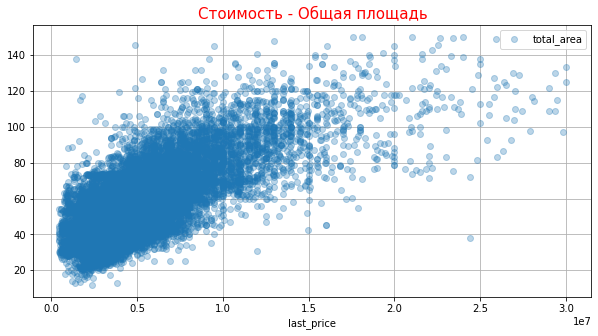

In [137]:
df.sort_values('total_area')\
.plot(x='last_price', y='total_area',grid=True, style= 'o', figsize=(10, 5), alpha= 0.3)\
.set_title('Стоимость - Общая площадь', fontsize = 15, color = 'red')

Text(0.5, 1.0, 'Стоимость - Жилая площадь')

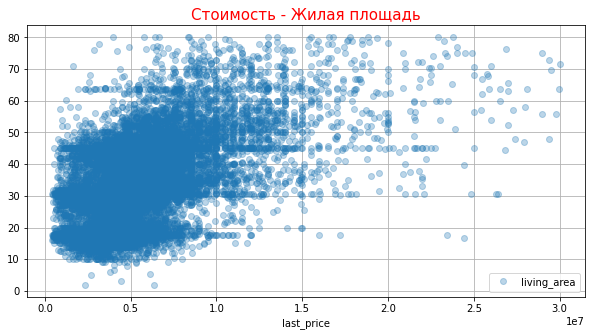

In [138]:
df.sort_values('living_area')\
.plot(x='last_price', y='living_area',grid=True, style= 'o', figsize=(10, 5), alpha= 0.3)\
.set_title('Стоимость - Жилая площадь', fontsize = 15, color = 'red')


Text(0.5, 1.0, 'Стоимость - Площадь кухни')

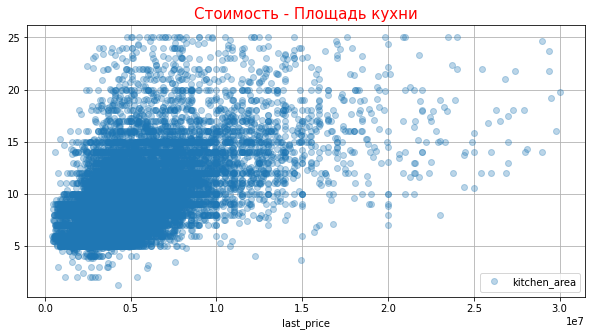

In [139]:
df.sort_values('kitchen_area')\
.plot(x='last_price', y='kitchen_area',grid=True, style= 'o', figsize=(10, 5), alpha= 0.3)\
.set_title('Стоимость - Площадь кухни', fontsize = 15, color = 'red')

Text(0.5, 1.0, 'Стоимость - Количество комнат')

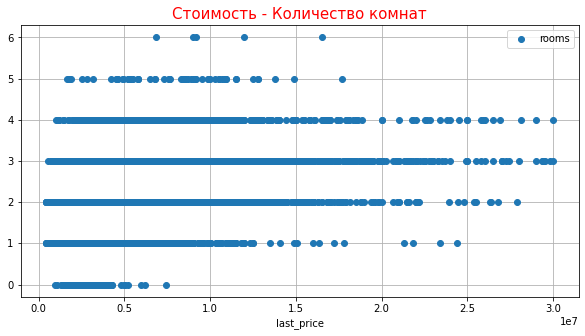

In [140]:
df.sort_values('rooms')\
.plot(x='last_price', y='rooms',grid=True, style= 'o', figsize=(10, 5))\
.set_title('Стоимость - Количество комнат', fontsize = 15, color = 'red')

<div class="alert alert-info"> 
    
Стоимость напрямую зависит от площади. Размер кухни повышает цену жилья. Трёхкомнатные квартиры дороже.


</div>

Text(0.5, 1.0, 'Год публикации объявления/стоимость')

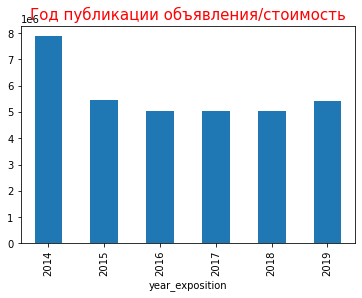

In [141]:
df.groupby('year_exposition')['last_price'].mean().plot.bar()\
.set_title('Год публикации объявления/стоимость', fontsize = 15, color = 'red')

Text(0.5, 1.0, 'Год публикации объявления/площадь')

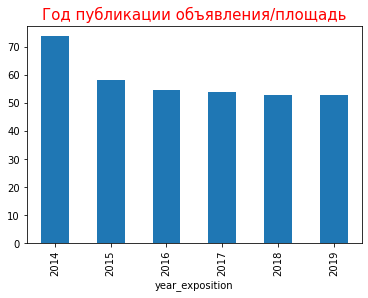

In [142]:
df.groupby('year_exposition')['total_area'].mean().plot.bar()\
.set_title('Год публикации объявления/площадь', fontsize = 15, color = 'red')

<div class="alert alert-info"> 
    
С 2014 года наблюдается снижение динамики продаж, по стоимомти и площади квартир.


</div>

Text(0.5, 1.0, 'Месяц публикации объявления')

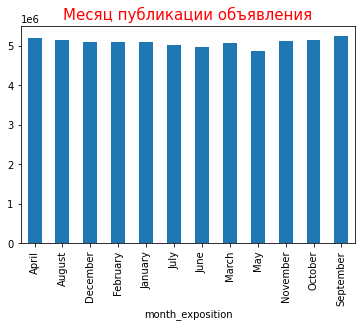

In [143]:
df.groupby('month_exposition')['last_price'].mean().plot.bar()\
.set_title('Месяц публикации объявления', fontsize = 15, color = 'red')

<div class="alert alert-info"> 
    
По месяцам - оживление на рынке в апреле, мае и сентябре.   


</div>

Text(0.5, 1.0, 'День публикации объявления')

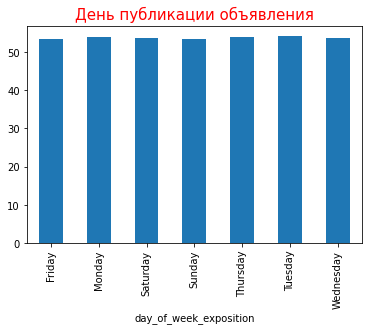

In [144]:
df.groupby('day_of_week_exposition')['total_area'].mean().plot.bar()\
.set_title('День публикации объявления', fontsize = 15, color = 'red')

<div class="alert alert-info"> 
    
В будние дни показатели продаж дорогих квартир выше.   


</div>

Text(0.5, 1.0, 'Этаж')

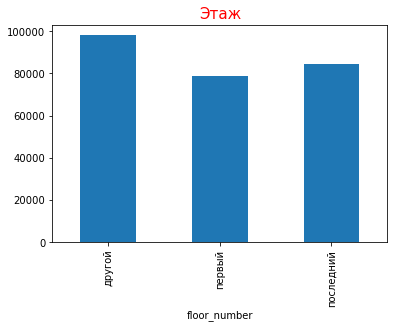

In [145]:
df.groupby('floor_number')['price_m2'].mean().plot.bar()\
.set_title('Этаж', fontsize = 15, color = 'red')

<div class="alert alert-info"> 
    
На первом этаже квартиры стоят меньше. 


</div>

#### 4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [146]:
(df['locality_name'].value_counts() / df.shape[0] * 100).head(10)

Санкт-Петербург     64.15
поселок Мурино       2.25
поселок Шушары       2.06
Всеволожск           1.86
Пушкин               1.58
Колпино              1.56
Гатчина              1.44
деревня Кудрово      1.40
Выборг               1.05
поселок Парголово    0.99
Name: locality_name, dtype: float64

<div class="alert alert-info"> 
    
Распределение 66/33. Пока нет фильтра, кроме Санкт-Петербурга будем считать другие города - в области. Посмотрим на топ-20 по стоимости квадратного метра. 
    

</div>

In [147]:
df.groupby('locality_name').agg({'price_m2':'mean'})\
.sort_values(by='price_m2', ascending=False).round().head(20)

,price_m2
locality_name,
поселок Лисий Нос,"113,728.00"
Санкт-Петербург,"108,443.00"
Зеленогорск,"108,441.00"
Пушкин,"101,778.00"
Сестрорецк,"101,723.00"
Кудрово,"100,100.00"
деревня Мистолово,"98,550.00"
поселок Левашово,"96,998.00"
деревня Кудрово,"92,645.00"


In [148]:
def locality_status(row):
    if row['locality_name'] == 'Санкт-Петербург':
        return 'Спб'
    else:
        return 'Лен область'

In [149]:
df['locality_status'] = df.apply(locality_status, axis=1)

In [150]:
df.groupby('locality_status').agg({'price_m2':'mean'}).sort_values(by='price_m2')

,price_m2
locality_status,
Лен область,"67,758.04"
Спб,"108,442.83"


<div class="alert alert-info"> 
    
В Санкт-Петербурге стоимость кв. м жилья почти в 2 раза больше, чем в Ленинградской области.

</div>

Text(0.5, 1.0, 'Область/Спб')

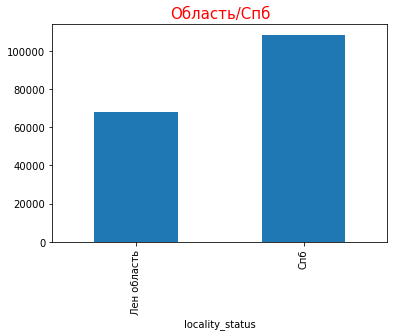

In [151]:
df.groupby('locality_status')['price_m2'].mean().plot.bar()\
.set_title('Область/Спб', fontsize = 15, color = 'red')

In [152]:
up_10_df = df.groupby('locality_name')\
    .agg({'locality_status':'count','price_m2':'mean'})
up_10_df = up_10_df.sort_values('locality_status', ascending=False).head(11)

In [153]:
up_10_df.sort_values('price_m2', ascending=False).head(11)

,locality_status,price_m2
locality_name,,
Санкт-Петербург,13266,"108,442.83"
Пушкин,327,"101,777.53"
деревня Кудрово,290,"92,645.20"
поселок Мурино,465,"85,925.81"
поселок Парголово,204,"85,726.65"
Петергоф,186,"83,463.58"
поселок Шушары,426,"78,754.47"
Колпино,323,"75,424.08"
Гатчина,298,"68,607.89"


<AxesSubplot:ylabel='locality_name'>

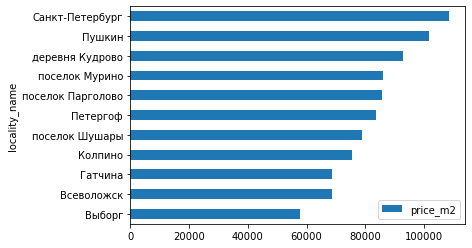

In [154]:
up_10_df.sort_values('price_m2', ascending=True)\
    .drop('locality_status', axis=1).plot(kind='barh')

<div class="alert alert-info"> 
    
В Петербурге жилье дорогое. По области, самая большая цена - в Пушкине, самая малая - в Выборге.

</div>

#### 5. Вычислим среднюю цену каждого километра

Text(0.5, 1.0, 'Средняя цена каждого километра ')

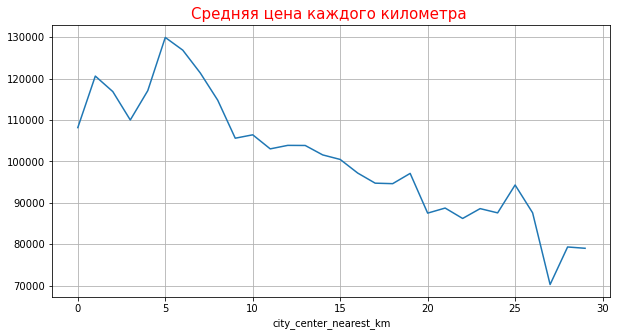

In [155]:
df[df['locality_name'] == 'Санкт-Петербург'].groupby('city_center_nearest_km')\
                                            .median()['price_m2']\
.plot(grid=True, figsize=(10, 5)).set_title('Средняя цена каждого километра ', fontsize = 15, color = 'red')


<div class="alert alert-info"> 
    
Стоимость объектов повышается по мере приближения к центру города.

</div>

In [156]:
(df[df['locality_name'] == 'Санкт-Петербург'].groupby('city_center_nearest_km')\
                                             .median()['price_m2']\
                                             .sort_values(ascending=False)).head(7)

city_center_nearest_km
5.00   129,909.52
6.00   126,847.29
7.00   121,348.31
1.00   120,588.24
4.00   117,079.65
2.00   116,852.77
8.00   114,762.57
Name: price_m2, dtype: float64

<div class="alert alert-info"> 
    
Проверим квартиры на 3, 5 и 27 км, чтобы понять как образуются выбросы

</div>

In [157]:
df.query('city_center_nearest_km == 27.00').groupby('price_m2')\
                                           .median()\
                                           .sort_values('price_m2', ascending=False).head(10)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,city_center_nearest_km,airports_nearest_km
price_m2,,,,,,,,,,,,,,,,,,,,,
"256,521.74",20.00,"29,500,000.00",115.00,3.00,3.00,2.00,69.75,2.00,0.00,0.00,0.00,19.20,4.00,3.00,229.00,3.00,172.00,328.00,"2,017.00",27.00,14.00
"167,410.71",11.00,"15,000,000.00",89.60,3.00,NaN,3.00,57.00,3.00,0.00,0.00,0.00,13.50,NaN,3.00,317.00,3.00,509.00,357.00,"2,017.00",27.00,15.00
"160,000.00",8.00,"16,912,000.00",105.70,2.00,2.70,3.00,48.40,1.00,0.00,0.00,0.00,15.40,NaN,3.00,366.00,3.00,179.00,390.00,"2,016.00",27.00,14.00
"159,000.00",14.00,"7,950,000.00",50.00,1.00,3.00,6.00,23.00,4.00,0.00,0.00,0.00,23.00,NaN,0.00,NaN,0.00,NaN,201.00,"2,017.00",27.00,14.00
"156,389.07",4.00,"12,300,000.00",78.65,3.00,NaN,5.00,48.00,1.00,0.00,0.00,0.00,11.00,0.00,2.00,403.00,0.00,NaN,4.00,"2,017.00",27.00,15.00
"145,312.50",9.00,"9,300,000.00",64.00,2.00,3.00,6.00,38.00,2.00,0.00,0.00,0.00,12.00,NaN,0.00,NaN,0.00,NaN,983.00,"2,016.00",27.00,15.00
"140,869.87",11.00,"8,000,000.00",56.79,2.00,NaN,5.00,32.08,5.00,0.00,0.00,0.00,NaN,0.00,1.00,517.00,0.00,NaN,4.00,"2,017.00",27.00,15.00
"132,857.14",10.00,"9,300,000.00",70.00,2.00,2.90,4.00,39.70,3.00,0.00,0.00,0.00,10.20,NaN,1.00,668.00,0.00,NaN,NaN,"2,018.00",27.00,14.00
"122,807.02",0.00,"3,500,000.00",28.50,1.00,2.50,5.00,16.00,4.00,0.00,0.00,0.00,5.00,1.00,0.00,NaN,0.00,NaN,86.00,"2,018.00",27.00,15.00


<div class="alert alert-info"> 
    
На 27 км есть одна выделяющаяся квартира стоимостью = 29.500.000

</div>

In [158]:
df.query('city_center_nearest_km == 5.00').groupby('price_m2')\
                                           .median()\
                                           .sort_values('price_m2', ascending=False).head(10)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,city_center_nearest_km,airports_nearest_km
price_m2,,,,,,,,,,,,,,,,,,,,,
"355,555.56",9.00,"16,000,000.00",45.00,1.00,2.95,8.00,17.60,8.00,0.00,0.00,0.00,NaN,NaN,2.00,529.00,0.00,NaN,NaN,"2,019.00",5.00,25.00
"324,727.27",5.00,"17,860,000.00",55.00,2.00,NaN,7.00,30.50,5.00,0.00,0.00,0.00,NaN,0.00,3.00,335.00,0.00,NaN,128.00,"2,016.00",5.00,24.00
"310,164.24",12.00,"23,417,400.00",75.50,1.00,NaN,8.00,17.60,4.00,0.00,0.00,0.00,NaN,NaN,0.00,NaN,2.00,198.00,111.00,"2,017.00",5.00,32.00
"307,216.49",20.00,"29,800,000.00",97.00,3.00,NaN,12.00,55.90,3.00,0.00,0.00,0.00,16.00,1.00,3.00,134.00,0.00,NaN,102.00,"2,017.00",5.00,25.00
"288,778.88",16.00,"17,500,000.00",60.60,2.00,2.95,8.00,33.10,3.00,0.00,0.00,0.00,12.40,0.00,2.00,529.00,0.00,NaN,12.00,"2,017.00",5.00,25.00
"288,172.04",5.00,"26,800,000.00",93.00,2.00,3.00,6.00,44.50,5.00,0.00,0.00,0.00,21.00,2.00,2.00,563.00,3.00,644.00,126.00,"2,017.00",5.00,32.00
"285,714.29",20.00,"21,000,000.00",73.50,2.00,2.70,23.00,40.00,9.00,0.00,0.00,0.00,10.00,NaN,0.00,NaN,2.00,444.00,NaN,"2,018.00",5.00,26.00
"285,276.07",13.00,"27,900,000.00",97.80,2.00,3.00,23.00,47.00,10.00,0.00,0.00,0.00,18.00,NaN,0.00,NaN,2.00,444.00,NaN,"2,019.00",5.00,26.00
"273,096.77",0.00,"25,398,000.00",93.00,2.00,NaN,9.00,57.00,8.00,0.00,0.00,0.00,12.00,1.00,1.00,648.00,1.00,779.00,272.00,"2,015.00",5.00,26.00


<div class="alert alert-info"> 

На 5-м км есть несколько объектов стоимостью  > 20.000.000 , что выше средней

</div>

In [159]:
df.query('city_center_nearest_km == 3.00').groupby('price_m2')\
                                           .median()\
                                           .sort_values('price_m2', ascending=False).head(10)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,city_center_nearest_km,airports_nearest_km
price_m2,,,,,,,,,,,,,,,,,,,,,
"255,000.00",7.00,"18,130,500.00",71.10,2.00,NaN,4.00,30.50,4.00,0.00,0.00,0.00,NaN,NaN,0.00,NaN,1.00,777.00,NaN,"2,019.00",3.00,24.00
"254,440.20",19.00,"19,999,000.00",78.60,3.00,2.96,6.00,50.20,4.00,0.00,0.00,0.00,10.00,NaN,1.00,592.00,0.00,NaN,180.00,"2,018.00",3.00,22.00
"215,097.40",19.00,"26,500,000.00",123.20,4.00,NaN,6.00,63.80,2.00,0.00,0.00,0.00,NaN,NaN,2.00,552.00,0.00,NaN,94.00,"2,018.00",3.00,25.00
"213,197.97",19.00,"16,800,000.00",78.80,2.00,2.90,9.00,38.80,3.00,0.00,0.00,0.00,18.00,NaN,1.00,613.00,1.00,200.00,NaN,"2,018.00",3.00,20.00
"197,431.78",19.00,"12,300,000.00",62.30,1.00,2.96,6.00,25.00,5.00,0.00,0.00,0.00,18.00,NaN,2.00,552.00,0.00,NaN,NaN,"2,018.00",3.00,25.00
"194,642.86",20.00,"10,900,000.00",56.00,1.00,3.00,8.00,24.00,3.00,0.00,0.00,0.00,20.00,NaN,3.00,528.00,2.00,383.00,133.00,"2,018.00",3.00,25.00
"187,142.86",6.00,"6,550,000.00",35.00,1.00,NaN,5.00,14.00,3.00,0.00,0.00,0.00,10.00,NaN,3.00,420.00,1.00,952.00,30.00,"2,019.00",3.00,21.00
"177,364.86",10.00,"5,250,000.00",29.60,1.00,3.00,5.00,16.40,5.00,0.00,0.00,0.00,6.20,1.00,2.00,332.00,3.00,50.00,55.00,"2,018.00",3.00,22.00
"172,413.79",10.00,"13,000,000.00",75.40,2.00,2.50,5.00,37.00,5.00,0.00,0.00,0.00,17.00,NaN,0.00,NaN,1.00,837.00,57.00,"2,017.00",3.00,22.00


<div class="alert alert-info"> 

На 3 км есть несколько объектов стоимостью  > 50.000.000 , что значительно выше средней

</div>

In [160]:
(
    df
     .query('3 <= city_center_nearest_km <=5 ')
     .groupby(['city_center_nearest_km', 'floor_number'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

### Общий вывод

<div class="alert alert-info"> 
    
**По временным характеристикам:**    
    
♦ С 2014 года наблюдается снижение динамики продаж, по стоимоcти и площади квартир. 

♦ По месяцам март и февраль - наибольшие показатели. Апрель и октя,рь чуть меньше, но выше других месяцев.  
    
♦ В будние дни показатели продаж дорогих квартир выше. 
    
♦ Продажа квартиры в среднем занимает около 78 дней, больше продаж происходит во вторник и среду.
    
    
    
    
    
    
**По характеристикам объектов:**      

♦ Стоимость жилья прямо пропорциональна расстоянию до него от центра города. Самые ходовые объекты - около 5 км от центра.
    
♦ Спрос выше на 5 и 9-этажные дома. 
    
♦ Наиболее востребованы квартиры общей площадью 30-75 кв.м - особенно 45 кв.м - это двухкомнатные, старой планировки, площадь кухни 10 кв.м, высота потолка - 2,5 м, расстояние до парка 400-500 м, расстояние до аэропорта 10-30 км. 
    
♦ Популярны 3-5 этажи, на 2 этаже продается больше квартир. На первом этаже квартиры стоят меньше. 
    
♦ На общую стоимость квартиры сильнее всего влияют: количество комнат и цена квадратного метра. 
    
   
     

**По характеристикам сделок с недвижимостью:** 
    
♦ Бысто продаются дорогие квартиры в 5-этажках, 1-комнатные судя по жилой площади, в 250 м от парка, в 5 км и 10-18 км от центра, на 3-5 этажах, высота потолка - 2,75 м.

♦ Необычно долго - в 9-этажках, 2-комнатные, в 450 м от парка, 12 км от центра, на 1-2 этажах, высота потолка - 2,5 м.
    
♦ В Санкт-Петербурге стоимость кв. м жилья почти в 2 раза больше, чем в Ленинградской области.   
    
♦ В Петербурге жилье дорогое. По области, самая большая цена - в Пушкине, самая малая - в Выборге.
    
♦ Стоимость объектов повышается по мере приближения к центру города. 
    
♦ **Средняя цена каждого километра ниже у квартир на первом и последнем этажах. На дугих этажах - около 9000.** 
    
</div>

<div class="alert alert-info">
    
**Рекомендации для площадки объявлений**
    
- Уделить внимание правилам валидации на сервере, чтобы больше не сталкиваться с проблемой отсутствующих значений.
- Продумать сценарий, при котором данные до парков, водоемов, аэропортов будут подтягиваться автоматически.
- Продумать сценарий, при котором серии домов будут подтягиваться автоматически.
- Считать расстояние в километрах и целых числах.
- Предупреждать пользователей о возможных некорректных значениях или показывать референс: "в вашем доме квартиры
стоят примерно столько".
    
</div>